In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\Hrushikesh\Downloads\insurance_claims.csv")
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


- The dataset contains details of insurance policy along with the customer details. It also has the detail of accident on the basis of which the claim has been made.
- The data set contained both categorical and numerical column. Here fraud reported is our target column, since it has the two categories it is a classification problem and we need to predict if an insurance claim is fraudulent or not

In [5]:
df.shape

(1000, 40)

- The data set contains 1000 rows and 40 columns out of which one is a target variable fraud reported

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

- This gives the information about the data set which include indexing type, column type, non null values and memory usages.
- Here the column _C39 has zeronull values which means it has one unique value throughout the data so we can drop this column


In [9]:
df.drop('_c39',axis=1,inplace=True)

In [10]:
df.isnull().sum()

months_as_customer              0
age                             0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_zip                     0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_date                   0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses     

- authorities_contacted column has 91 null values it is a categorical column so we will fill it by mode method

In [12]:
df['authorities_contacted'].value_counts()

authorities_contacted
Police       292
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64

In [13]:
df['authorities_contacted'] = df['authorities_contacted'].fillna(df['authorities_contacted'].mode()[0])

In [14]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

<Axes: >

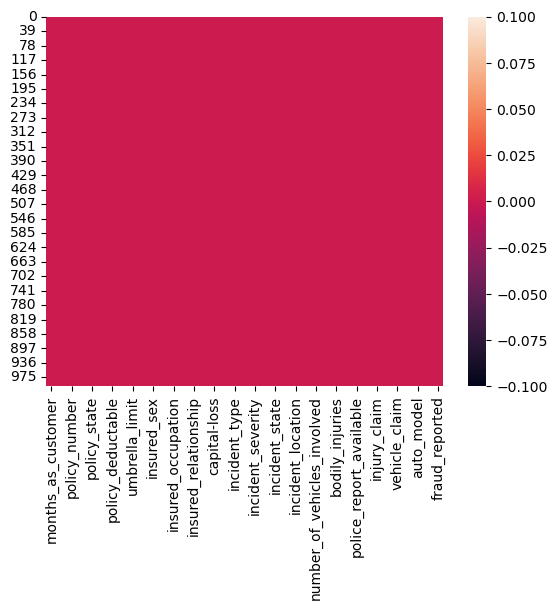

In [15]:
sns.heatmap(df.isnull())

- We can clearly see that there is no null values present in the dataset now 

In [17]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

- The dataset contains three types of datatypes namely integer,float and object 

In [19]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

- we can observe the column policy_number and incident_location have thousand unique values which means they have only one value count. So it is not required for prediction and we can drop it

In [21]:
df.drop('policy_number',axis=1,inplace=True)
df.drop('incident_location',axis=1,inplace=True)

In [22]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64


age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64


policy_bind_date
2006-01-01    3
1992-04-28    3
1992-08-05    3
1991-12-14    2
2004-08-09    2
             ..
2014-06-03    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: count, Length: 951, dtype: int64


policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64


policy_csl
250/500     351
100/300     349
500/1000    300
Name: count, dtype: int64


pol

- By looking at the value counts of each column we can realize that the columns umbrella_remit, capital_gain and capital_loss contains more zero values around 79.8%, 50.8% and 47.5% respectively. I'm keeping the zero values in a capital gain and capital loss columns as it is since umbrella limit column has more than 70% of 0 values less drop it

In [24]:
df.drop('umbrella_limit',axis=1,inplace=True)
df.drop('insured_zip',axis=1,inplace=True)

In [25]:
# Converting date columns from object to datetime 
df['policy_bind_date']= pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

In [26]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                         object
incident_city                          object
incident_hour_of_the_day          

In [27]:
#extracting day, month, year column from policy bind date 
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

#extracting day, month, year column from incident_date
df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year


- No we have extracted the month and year corner from both policy blind date and incident date so we can drop this column

In [29]:
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [30]:
# Checking which columns contain ?
df[df.columns[(df=='?').any()]].nunique()

collision_type             4
property_damage            3
police_report_available    3
dtype: int64

In [31]:
df['collision_type'] = df.collision_type.str.replace('?',df['collision_type'].mode()[0])
df['property_damage'] = df.property_damage.str.replace('?','NO')
df['police_report_available'] = df.police_report_available.str.replace('?','NO')

In [32]:
df['csl_per_person']=df.policy_csl.str.split('/',expand=True)[0]
df['csl_per_accident']=df.policy_csl.str.split('/',expand=True)[1]

In [33]:
#converting object datatype into integer datatype
df['csl_per_person']=df['csl_per_person'].astype('int64')
df['csl_per_accident']=df['csl_per_accident'].astype('int64')

In [34]:
df.drop('policy_csl',axis=1,inplace=True)

In [35]:
df['Vehicle_Age']=2018-df['auto_year']
df.drop('auto_year',axis=1,inplace=True)

In [36]:
df.nunique()

months_as_customer             391
age                             46
policy_state                     3
policy_deductable                3
policy_annual_premium          991
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            4
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim                   638
property_claim                 626
vehicle_claim                  726
auto_make           

- These are the unique value present in each column after feature extraction and selection here incident year old has won unique value throughout the column also it is not impacting the prediction so we can drop this column

In [38]:
df.drop('incident_year',axis=1,inplace=True)
df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_model,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,csl_per_person,csl_per_accident,Vehicle_Age
0,328,48,OH,1000,1406.91,MALE,MD,craft-repair,sleeping,husband,...,92x,Y,17,10,2014,25,1,250,500,14
1,228,42,IN,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,...,E400,Y,27,6,2006,21,1,250,500,11
2,134,29,OH,2000,1413.14,FEMALE,PhD,sales,board-games,own-child,...,RAM,N,6,9,2000,22,2,100,300,11
3,256,41,IL,2000,1415.74,FEMALE,PhD,armed-forces,board-games,unmarried,...,Tahoe,Y,25,5,1990,10,1,250,500,4
4,228,44,IL,1000,1583.91,MALE,Associate,sales,board-games,unmarried,...,RSX,N,6,6,2014,17,2,500,1000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,FEMALE,Masters,craft-repair,paintball,unmarried,...,Accord,N,16,7,1991,22,2,500,1000,12
996,285,41,IL,1000,1436.79,FEMALE,PhD,prof-specialty,sleeping,wife,...,Passat,N,5,1,2014,24,1,100,300,3
997,130,34,OH,500,1383.49,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,...,Impreza,N,17,2,2003,23,1,250,500,22
998,458,62,IL,2000,1356.92,MALE,Associate,handlers-cleaners,base-jumping,wife,...,A5,N,18,11,2011,26,2,500,1000,20


In [39]:
#checking for categorical column
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [40]:
#checking for numerical column
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'csl_per_person', 'csl_per_accident', 'Vehicle_Age']


In [41]:
# Checking the target values of target column
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

- These are the two unique categories in the fraud reported column. This column values represent if the insurance is fraudulent or not

In [43]:
# Checking the value counts of target column
df['fraud_reported'].value_counts()

fraud_reported
N    753
Y    247
Name: count, dtype: int64

- From the value gain we can notice that the data is not balance so we can use over sampling method to balance the data before building the models

In [45]:
#description of data
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,property_claim,vehicle_claim,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,csl_per_person,csl_per_accident,Vehicle_Age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,...,7399.570000,37928.950000,15.448000,6.559000,2001.604000,14.995000,1.496000,272.650000,580.200000,12.897000
std,115.113174,9.140287,611.864673,244.167395,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,...,4824.726179,18886.252893,8.808001,3.499824,7.360391,8.670995,0.523697,161.603196,287.420547,6.015861
min,0.000000,19.000000,500.000000,433.330000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,...,0.000000,70.000000,1.000000,1.000000,1990.000000,1.000000,1.000000,100.000000,300.000000,3.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,...,4445.000000,30292.500000,8.000000,3.000000,1995.000000,7.750000,1.000000,100.000000,300.000000,8.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,...,6750.000000,42100.000000,16.000000,7.000000,2002.000000,15.000000,1.000000,250.000000,500.000000,13.000000
75%,276.250000,44.000000,2000.000000,1415.695000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,...,10885.000000,50822.500000,23.000000,10.000000,2008.000000,22.000000,2.000000,500.000000,1000.000000,18.000000
max,479.000000,64.000000,2000.000000,2047.590000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,...,23670.000000,79560.000000,31.000000,12.000000,2015.000000,31.000000,3.000000,500.000000,1000.000000,23.000000


These give the statistical summary of the dataset

- Here the count of all columns are equal which means there are no missing values in dataset.

- In some of the columns like policy_deductable, capital_gain, injury_clain etc we can observe the mean value is greater than the median which means the data inj those columns are skewed to the right.

- And in some of the columns like total_claim_amount, vehicle_claim etc we can observe the median is greater than the mean which means the data in the columns are skewed to the left.

- And some of the columns have equal mean and median that means the data symmetric and is normally distributed and so skewness present.

- There is a huge difference in 75% and max it shows that huge outliers present in the columns.

fraud_reported
N    753
Y    247
Name: count, dtype: int64


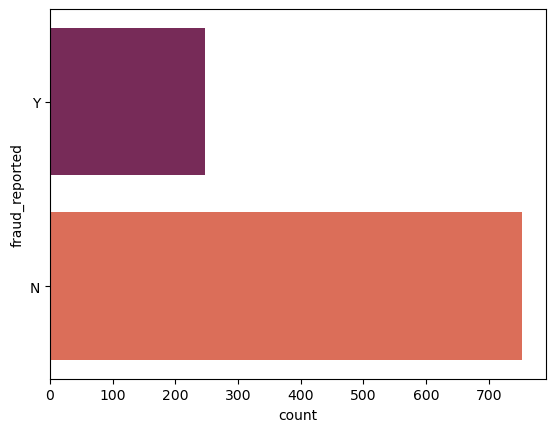

In [47]:
print(df['fraud_reported'].value_counts())
sns.countplot(df['fraud_reported'],palette='rocket')
plt.show()

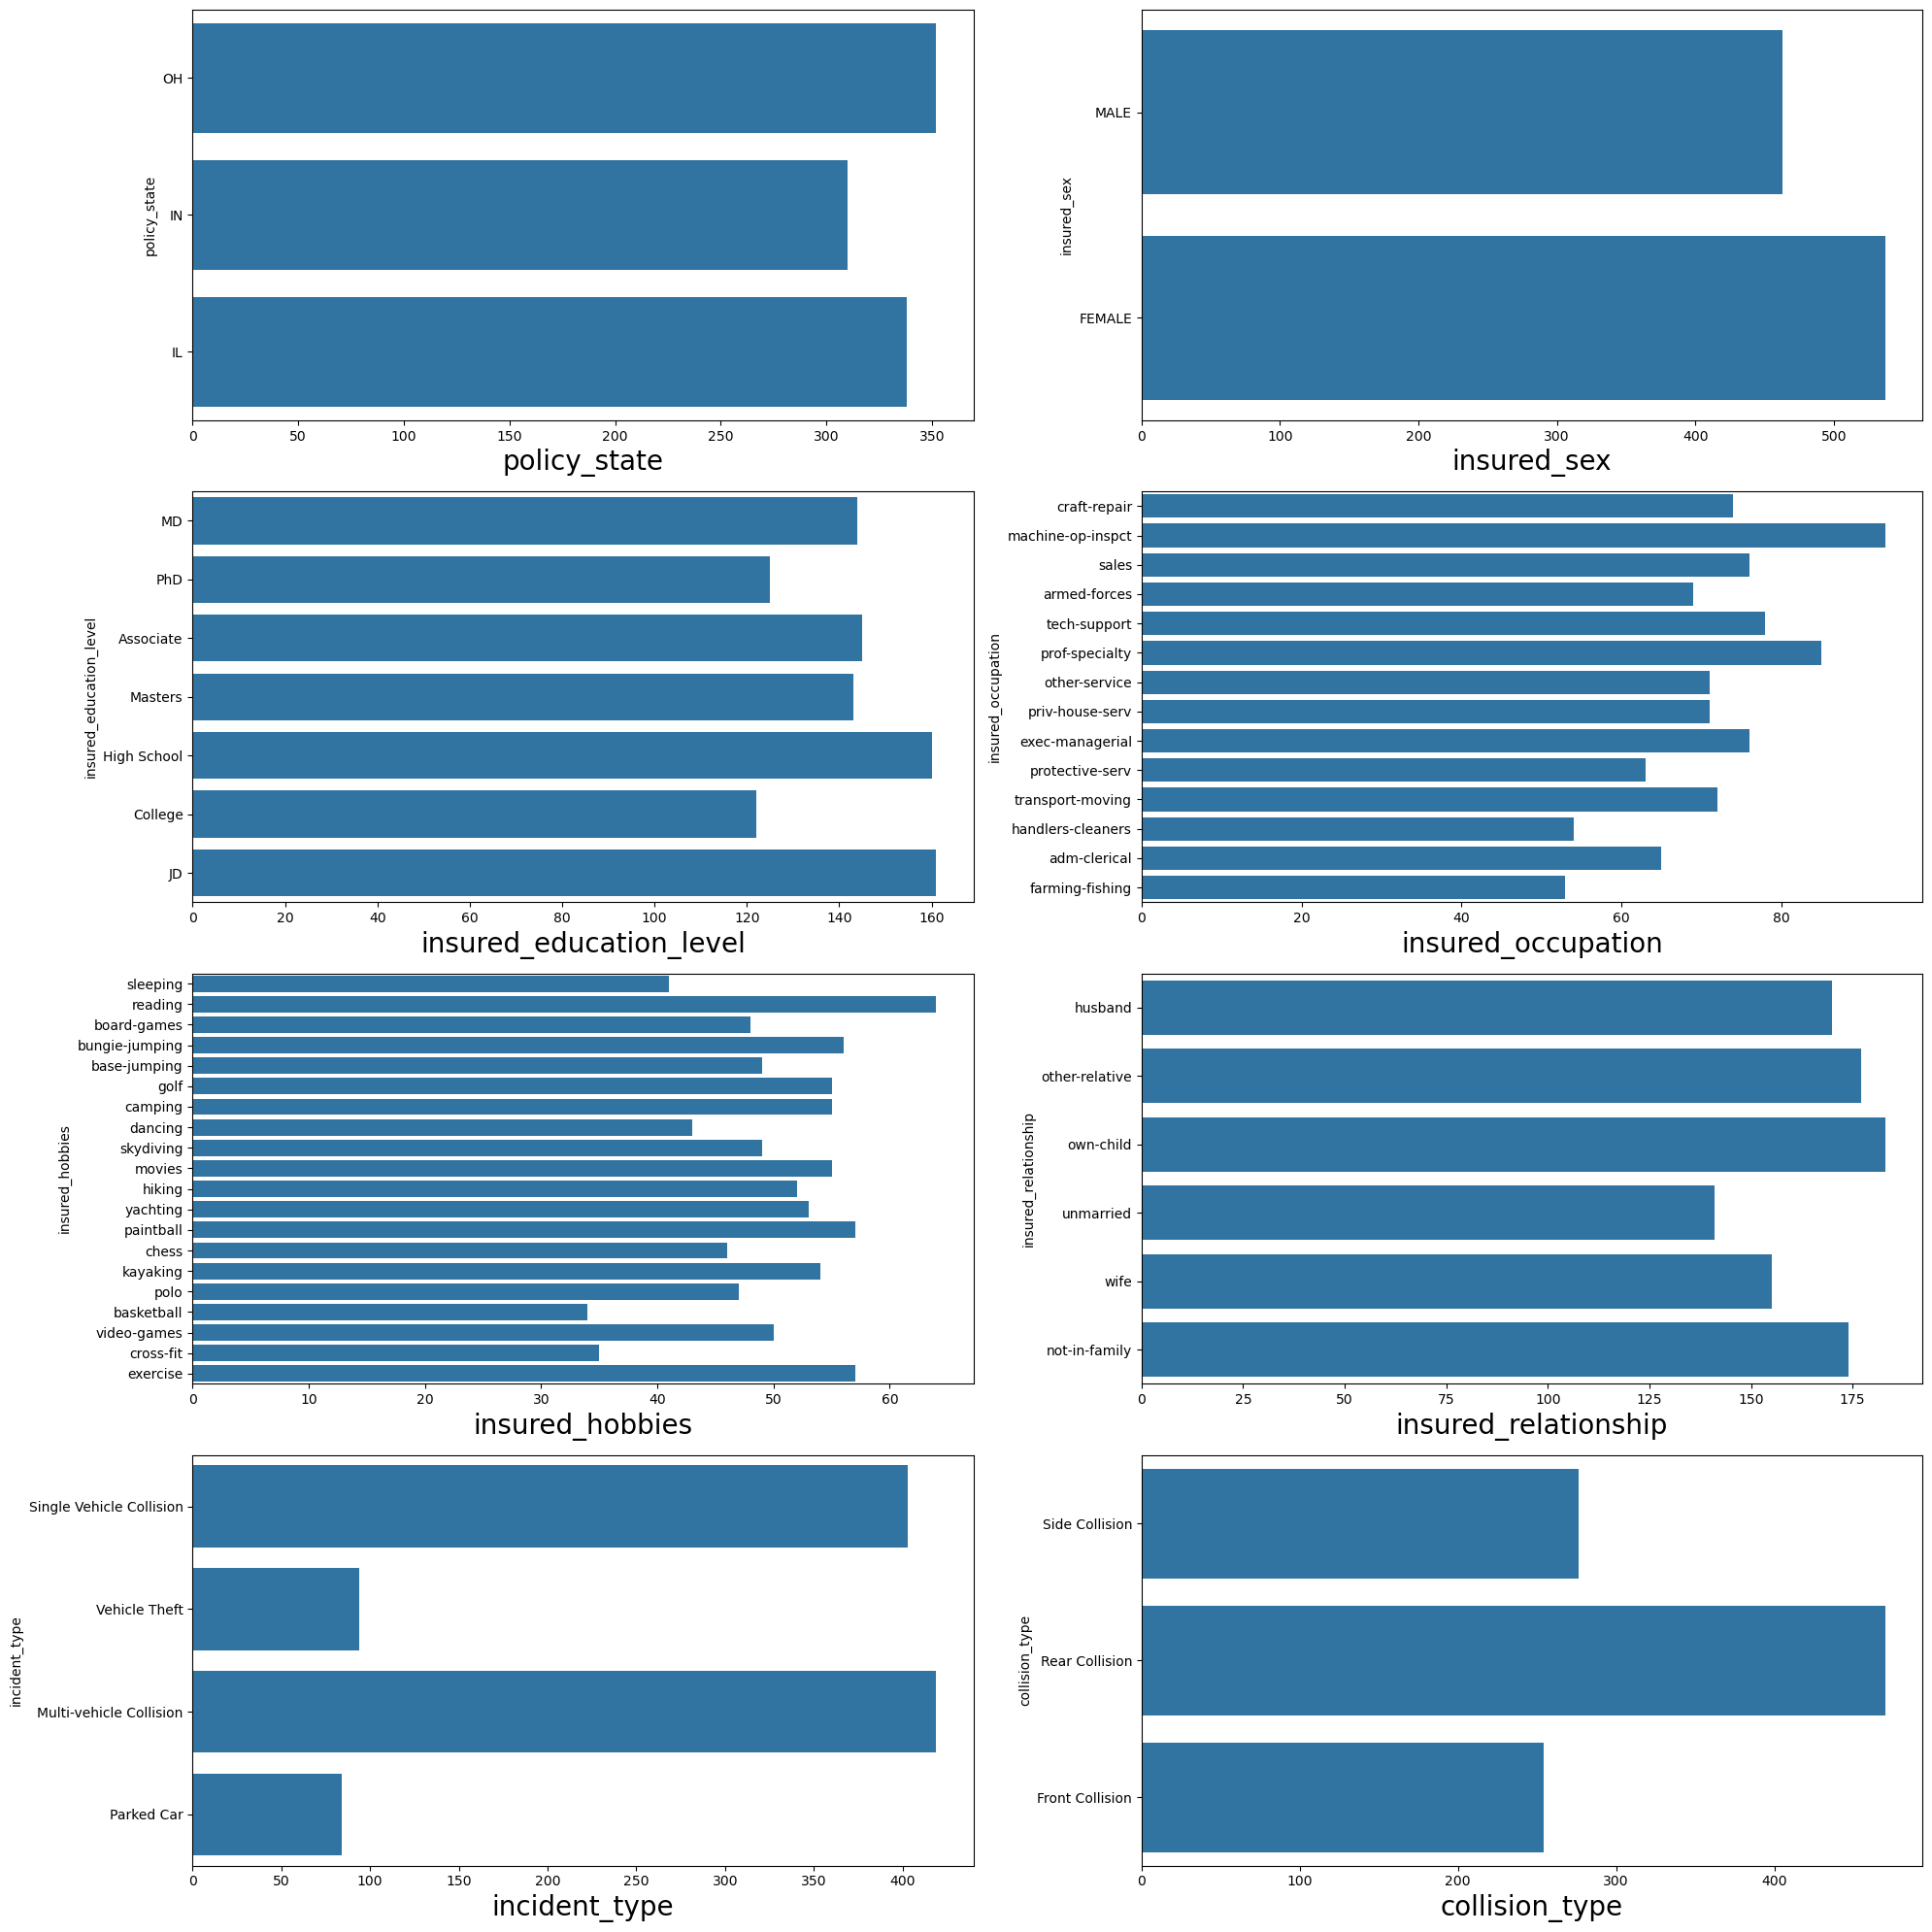

In [48]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in categorical_col:
    if plotnumber<=8:
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

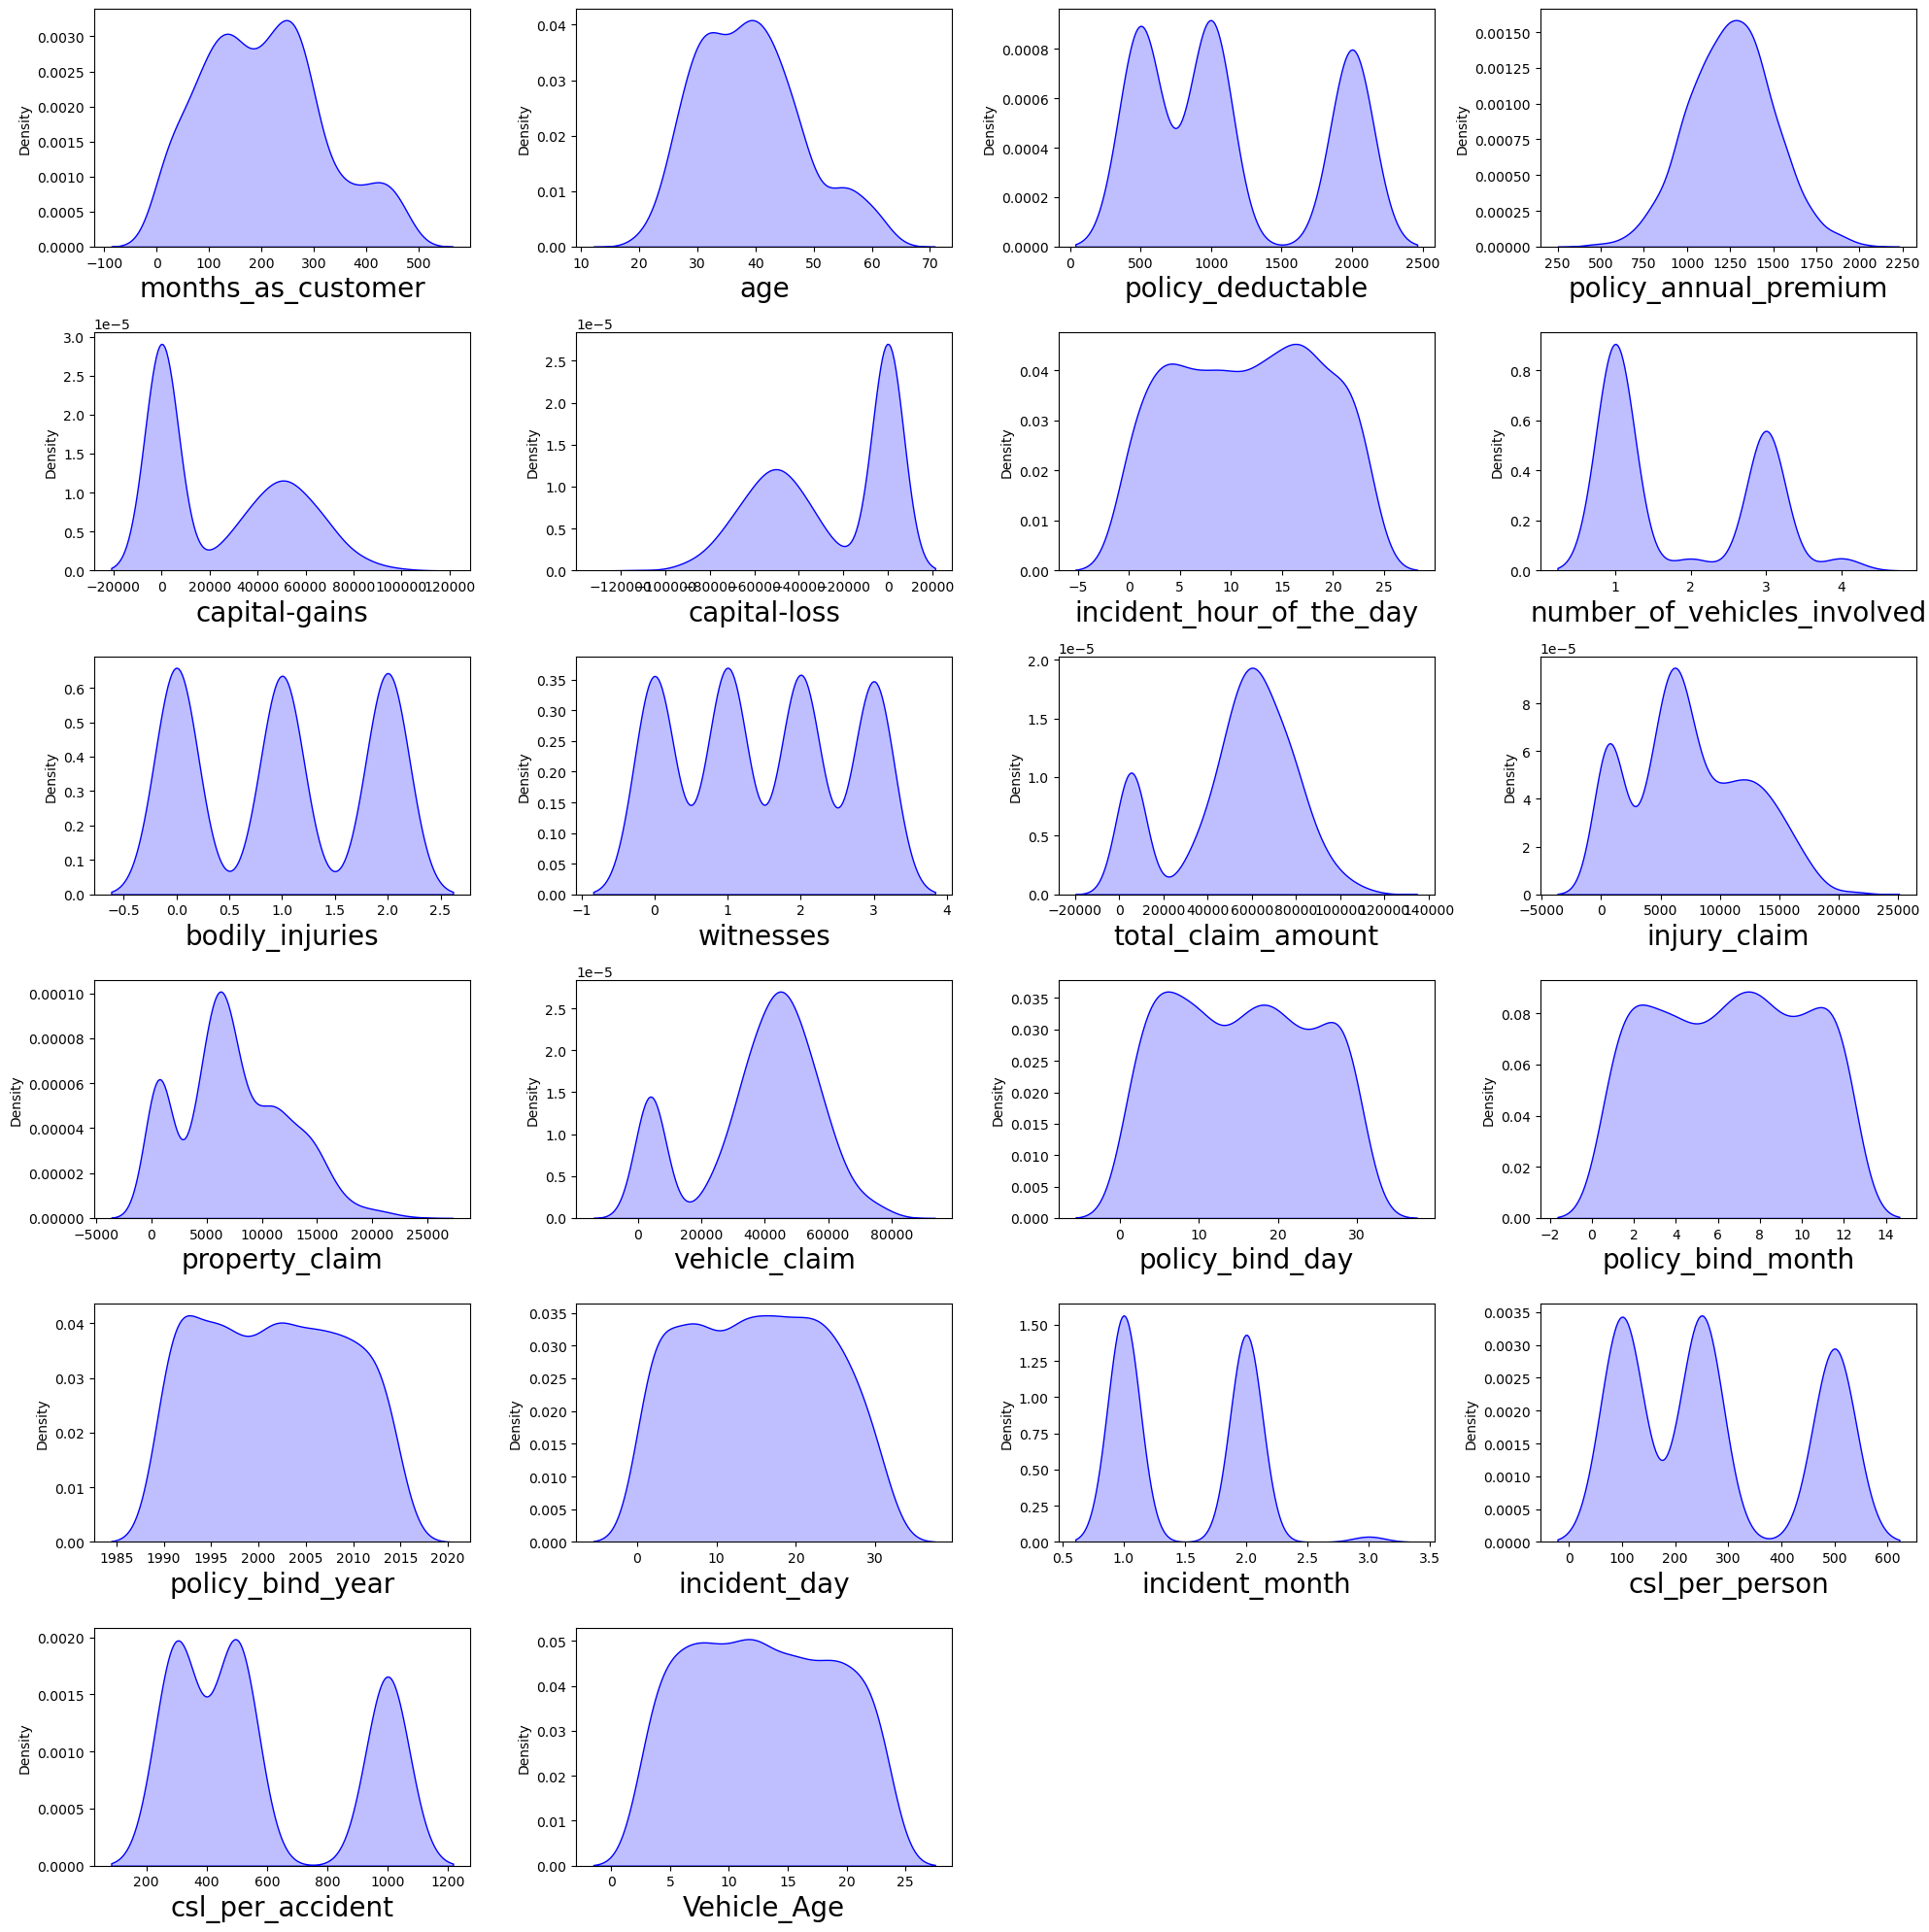

In [49]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=23:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='b',hist=False,kde_kws={'shade':True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

Above are the distribution plots of numerical columns. From the above we have observed that
- The data is normally distributed in most of the columns
- Some of the columns like captal gain, incident month are skewed to the right
- The data in the column capital loss is skewed to left.

# Bivariate Analysis

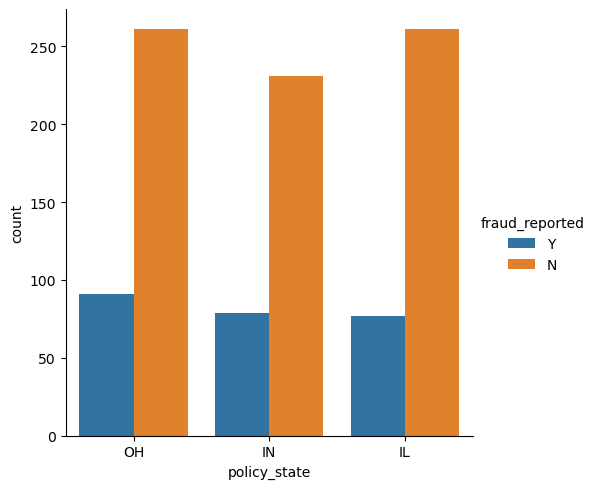

In [52]:
sns.catplot(x='policy_state',kind='count',data=df,hue='fraud_reported')

- Fraud report is in OH state

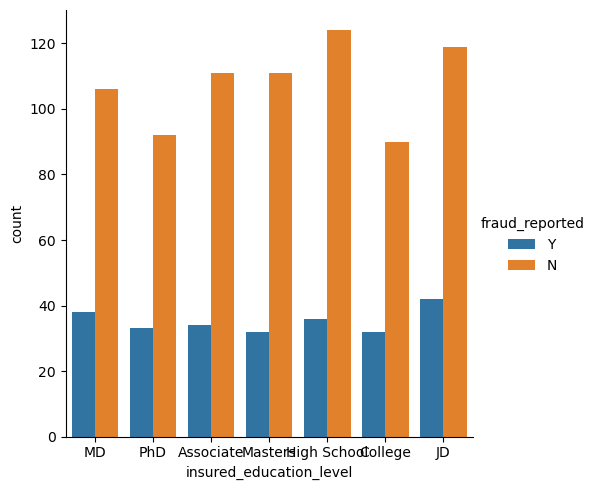

In [54]:
sns.catplot(x='insured_education_level',data=df,kind='count',hue='fraud_reported')

- The fradulent level is very less gor the people who have high school education and the people who have completed their JD education have high fraud report. The people who have high insured education are facing insurance fraudluent compared to the people with less insured education level

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

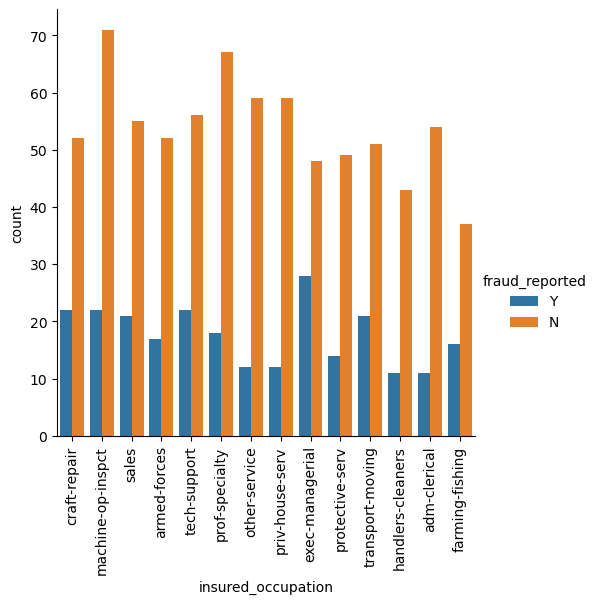

In [56]:
sns.catplot(x='insured_occupation',data=df,kind='count',hue='fraud_reported')
plt.xticks(rotation=90)

- The people who are in the position exec-managerials have high fraud reports compared to others.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'sleeping'),
  Text(1, 0, 'reading'),
  Text(2, 0, 'board-games'),
  Text(3, 0, 'bungie-jumping'),
  Text(4, 0, 'base-jumping'),
  Text(5, 0, 'golf'),
  Text(6, 0, 'camping'),
  Text(7, 0, 'dancing'),
  Text(8, 0, 'skydiving'),
  Text(9, 0, 'movies'),
  Text(10, 0, 'hiking'),
  Text(11, 0, 'yachting'),
  Text(12, 0, 'paintball'),
  Text(13, 0, 'chess'),
  Text(14, 0, 'kayaking'),
  Text(15, 0, 'polo'),
  Text(16, 0, 'basketball'),
  Text(17, 0, 'video-games'),
  Text(18, 0, 'cross-fit'),
  Text(19, 0, 'exercise')])

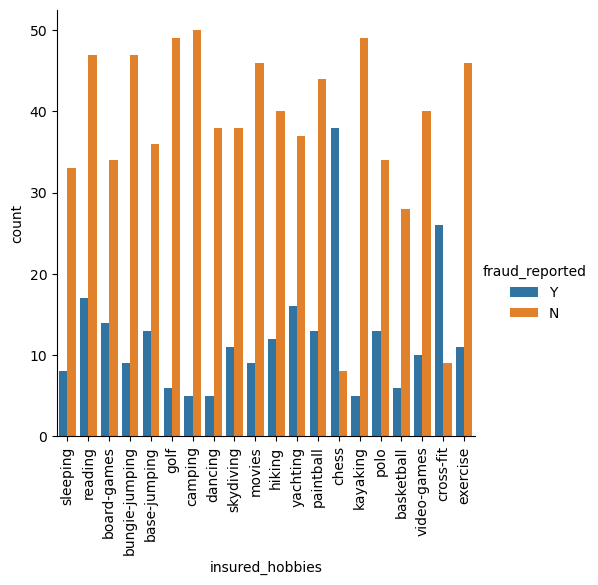

In [58]:
sns.catplot(x='insured_hobbies',data=df,kind='count',hue='fraud_reported')
plt.xticks(rotation=90)

- The fraud report is igh for the people who have the hobby of playing chess and cross fit.

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'husband'),
  Text(1, 0, 'other-relative'),
  Text(2, 0, 'own-child'),
  Text(3, 0, 'unmarried'),
  Text(4, 0, 'wife'),
  Text(5, 0, 'not-in-family')])

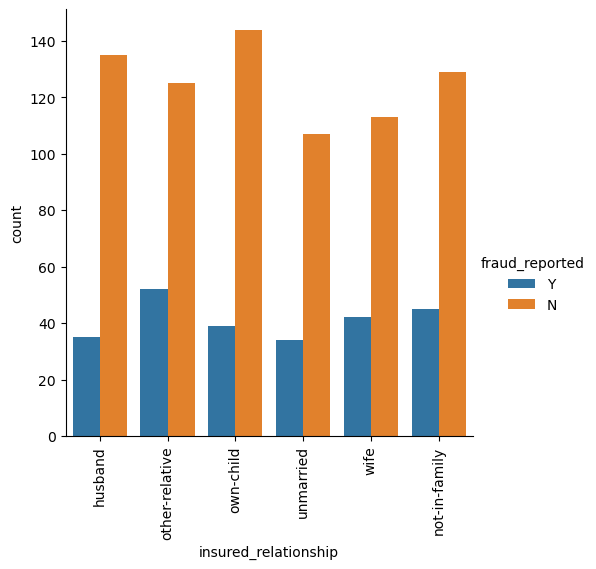

In [60]:
sns.catplot(x='insured_relationship',data=df,kind='count',hue='fraud_reported')
plt.xticks(rotation=90)

- The frsud report is high for the customers who have other relative and it is less for unmarried people.

([0, 1, 2, 3],
 [Text(0, 0, 'Single Vehicle Collision'),
  Text(1, 0, 'Vehicle Theft'),
  Text(2, 0, 'Multi-vehicle Collision'),
  Text(3, 0, 'Parked Car')])

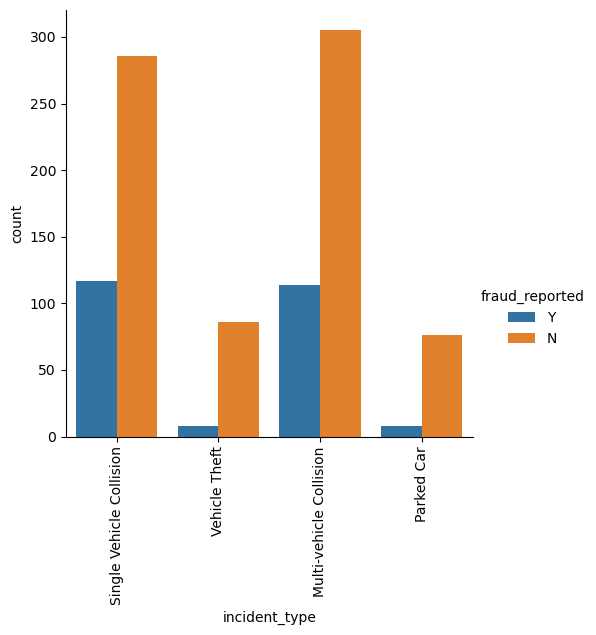

In [62]:
sns.catplot(x='incident_type',data=df,kind='count',hue='fraud_reported')
plt.xticks(rotation=90)

- In Multivehicle collision and single vehicle collision, the fraud report is very high compared to others.

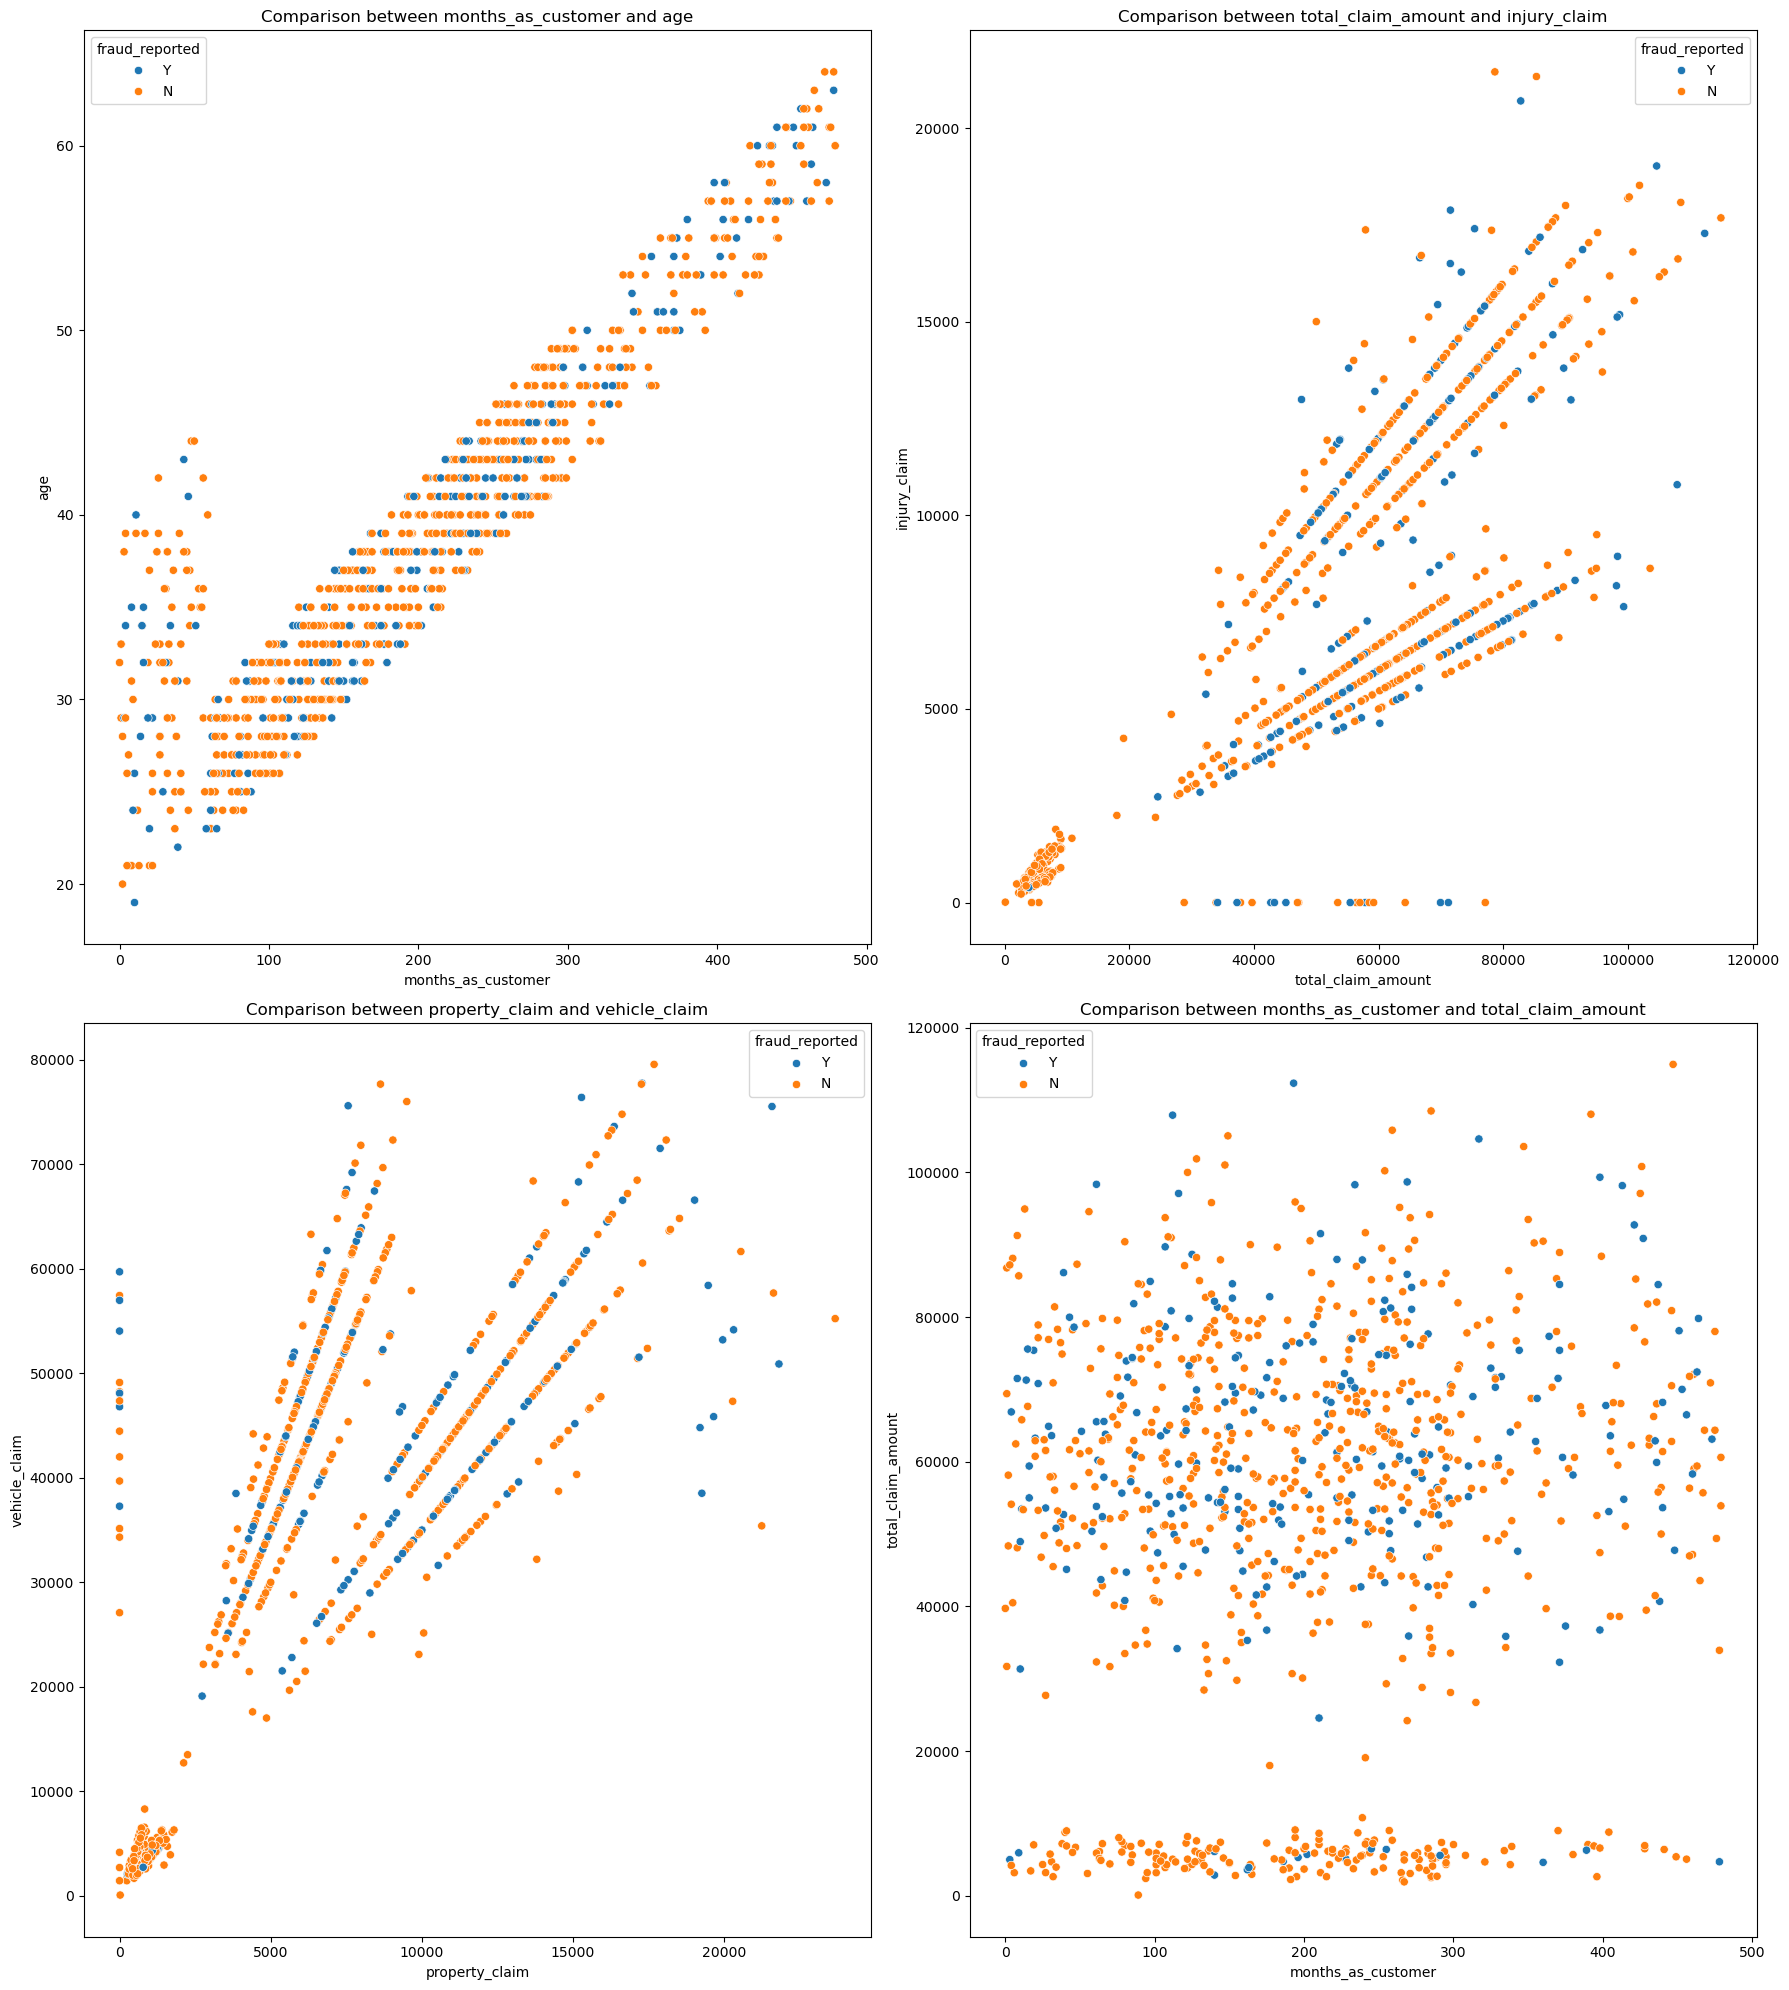

In [64]:
# Setting the figure size
plt.figure(figsize=(18,20))

# First subplot
plt.subplot(2, 2, 1)
plt.title("Comparison between months_as_customer and age")
sns.scatterplot(x='months_as_customer', y='age', hue='fraud_reported', data=df)

# Second subplot
plt.subplot(2, 2, 2)
plt.title("Comparison between total_claim_amount and injury_claim")
sns.scatterplot(x='total_claim_amount', y='injury_claim', hue='fraud_reported', data=df)

# Third subplot
plt.subplot(2, 2, 3)
plt.title("Comparison between property_claim and vehicle_claim")
sns.scatterplot(x='property_claim', y='vehicle_claim', hue='fraud_reported', data=df)

# Fourth subplot
plt.subplot(2, 2, 4)
plt.title("Comparison between months_as_customer and total_claim_amount")
sns.scatterplot(x='months_as_customer', y='total_claim_amount', hue='fraud_reported', data=df)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

From the above scatterplot we can observe the following things.

- There is a positive linear relation between age and month_as_customer column. As age increases the month_as_customers also increasesm also the fraud reported is very less in this case.- In the second graph we can observe the positive linear relation, as the property claim increses, vehicle claim is also increses.
- Third plot is also same as second one that is as the property claim increases, vehicle claim also increases.
- In the fourth plot we can observe the data is scattered and there is no mucch relation between the features.


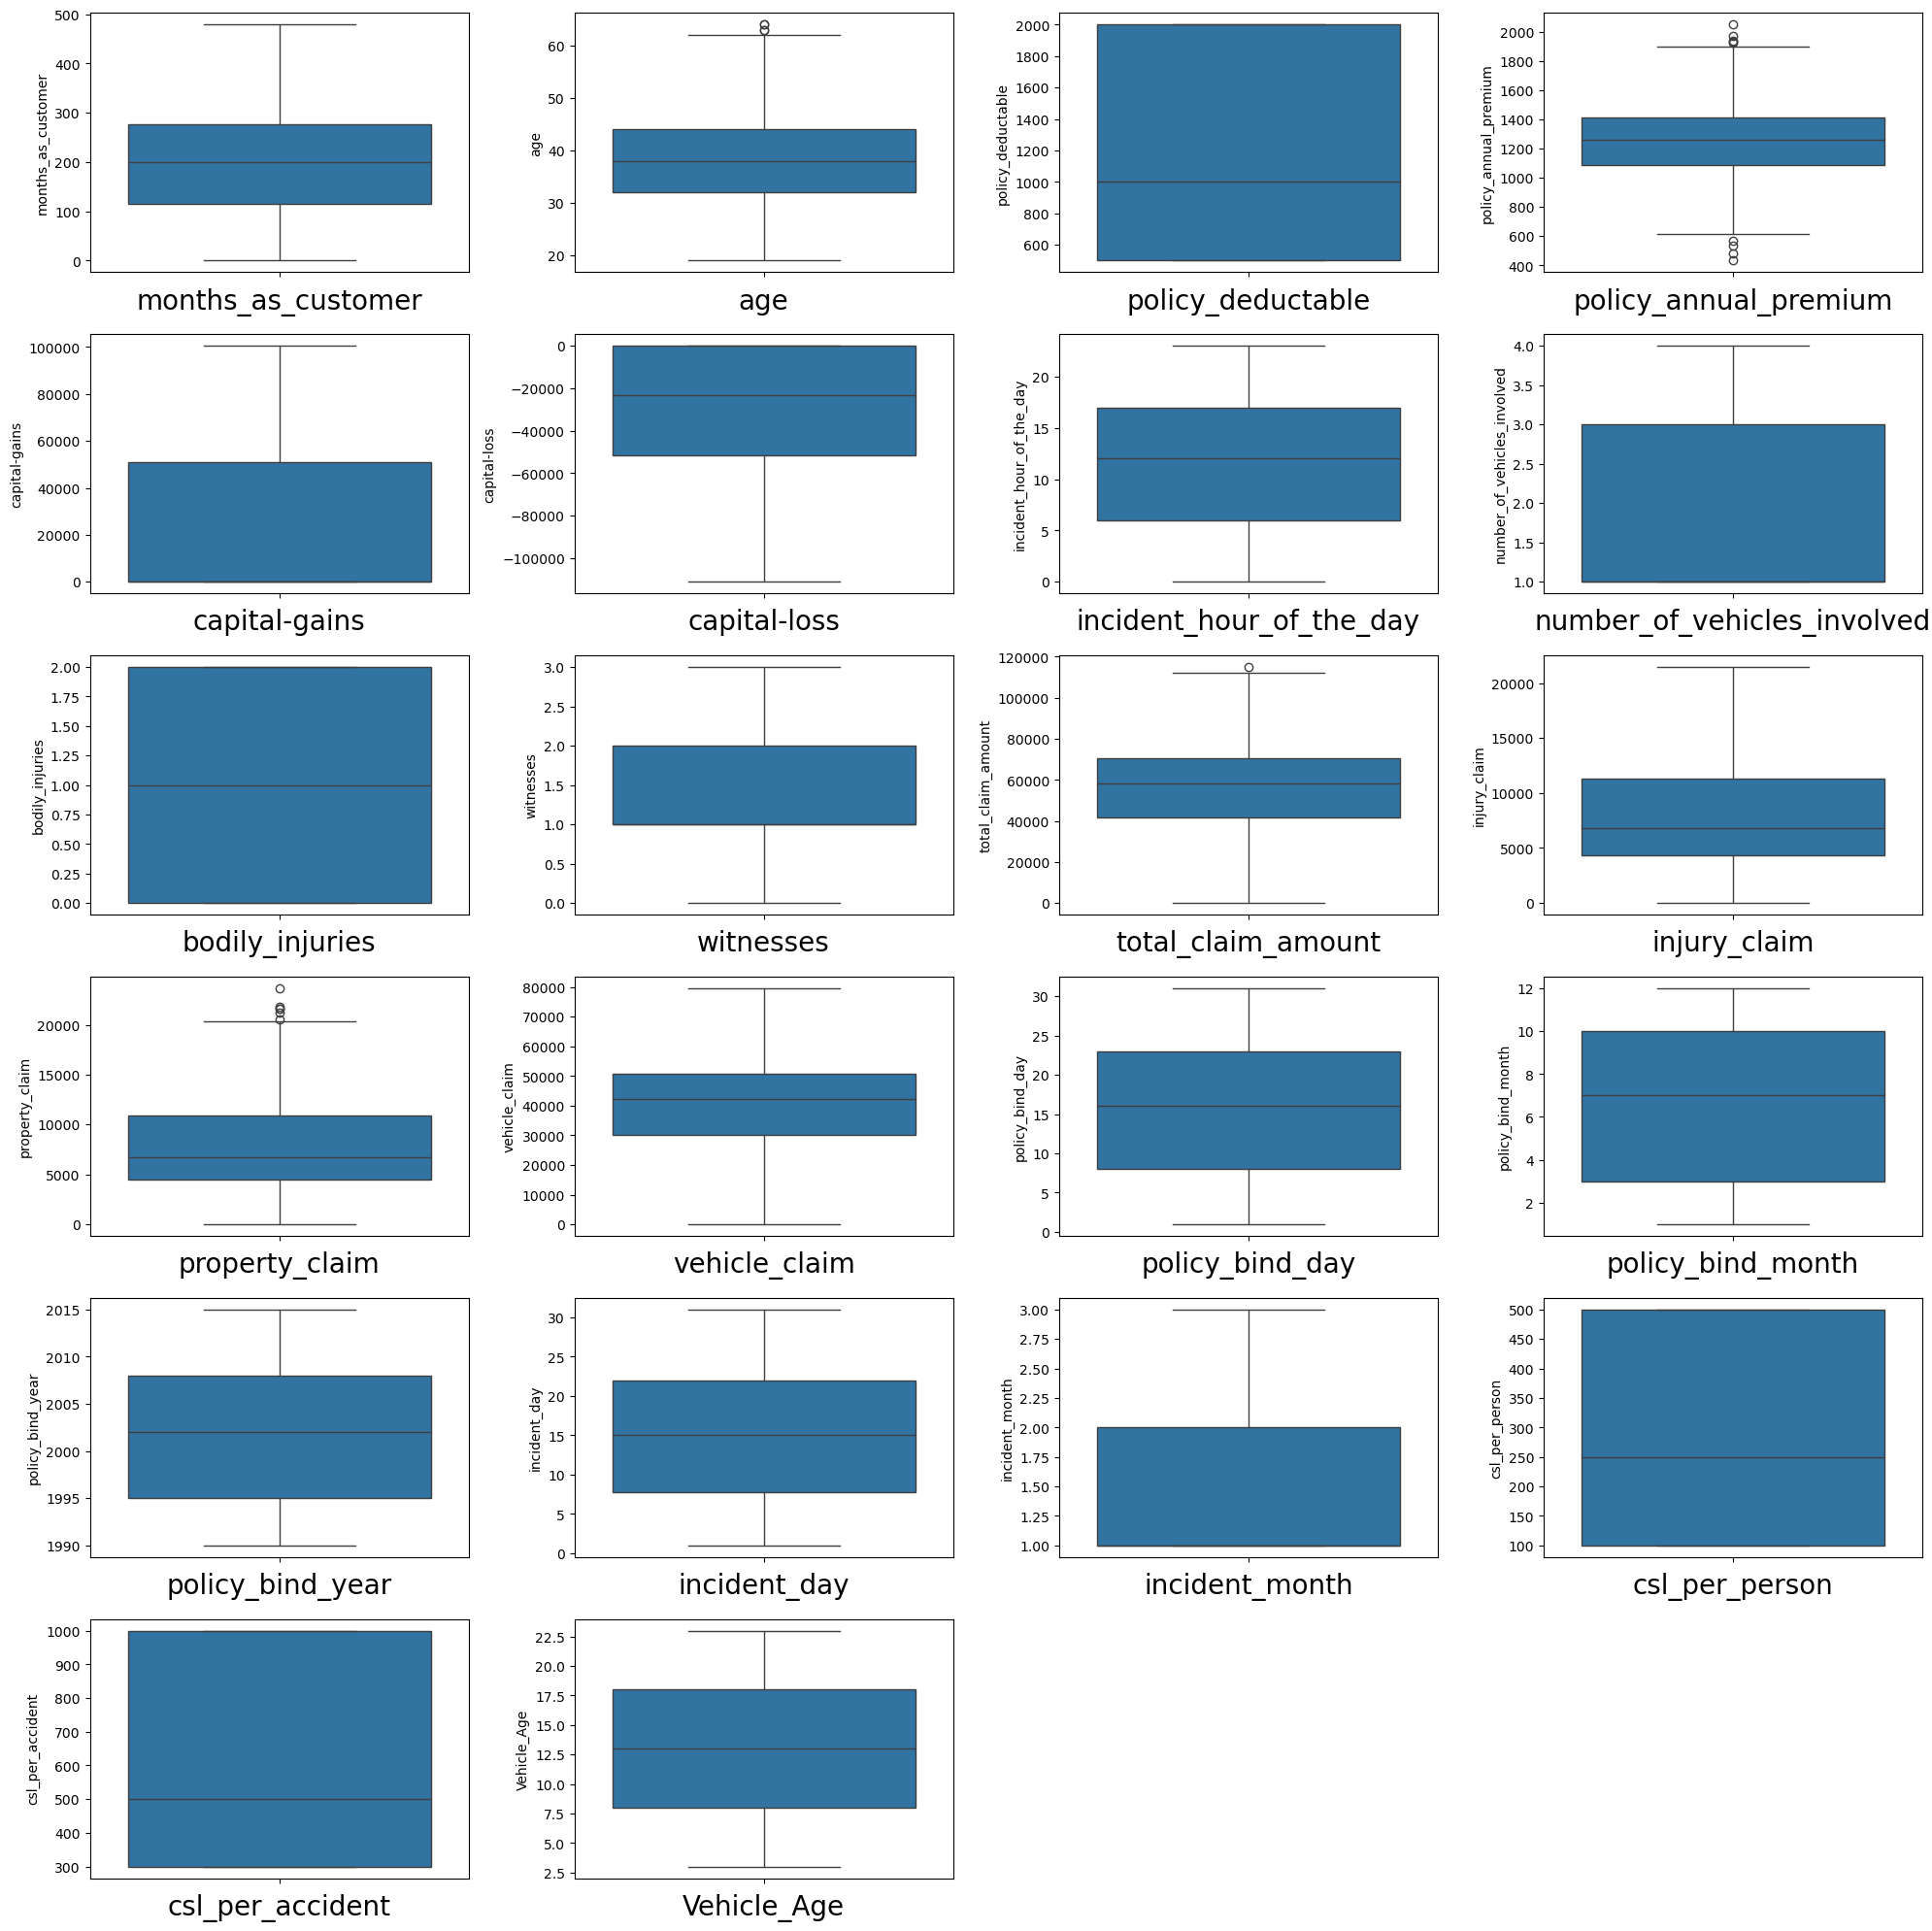

In [66]:
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=23:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can find the outliers in the following columns.

age
policy_annual_premium
total_claim_amount
property_claim
incident

These are the numerical columns which contain outliers. Let's remove outliers in these columns using Zscore, method or IQR method.
_monthethod.

In [68]:
#Zscore
from scipy.stats import zscore
features =df[['age','policy_annual_premium','total_claim_amount','property_claim','incident_month']]
z = np.abs(zscore(features))
z

,age,policy_annual_premium,total_claim_amount,property_claim,incident_month
0,0.990836,0.616705,0.714257,1.165505,0.947587
1,0.334073,0.242521,1.807312,1.372696,0.947587
2,1.088913,0.642233,0.686362,0.736072,0.962871
3,0.224613,0.652886,0.403135,0.219722,0.947587
4,0.552994,1.341980,1.753121,1.399654,0.962871
...,...,...,...,...,...
995,0.103769,0.222884,1.305049,0.273817,0.962871
996,0.224613,0.739141,2.111466,2.214794,0.947587
997,0.541611,0.520739,0.558507,0.020826,0.947587
998,2.523284,0.411866,0.219110,0.451976,0.962871


In [69]:
new_df = df[(z<3).all(axis=1)]
new_df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_model,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,csl_per_person,csl_per_accident,Vehicle_Age
0,328,48,OH,1000,1406.91,MALE,MD,craft-repair,sleeping,husband,...,92x,Y,17,10,2014,25,1,250,500,14
1,228,42,IN,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,...,E400,Y,27,6,2006,21,1,250,500,11
2,134,29,OH,2000,1413.14,FEMALE,PhD,sales,board-games,own-child,...,RAM,N,6,9,2000,22,2,100,300,11
3,256,41,IL,2000,1415.74,FEMALE,PhD,armed-forces,board-games,unmarried,...,Tahoe,Y,25,5,1990,10,1,250,500,4
4,228,44,IL,1000,1583.91,MALE,Associate,sales,board-games,unmarried,...,RSX,N,6,6,2014,17,2,500,1000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,FEMALE,Masters,craft-repair,paintball,unmarried,...,Accord,N,16,7,1991,22,2,500,1000,12
996,285,41,IL,1000,1436.79,FEMALE,PhD,prof-specialty,sleeping,wife,...,Passat,N,5,1,2014,24,1,100,300,3
997,130,34,OH,500,1383.49,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,...,Impreza,N,17,2,2003,23,1,250,500,22
998,458,62,IL,2000,1356.92,MALE,Associate,handlers-cleaners,base-jumping,wife,...,A5,N,18,11,2011,26,2,500,1000,20


print(df.shape)
print(new_df.shape)

In [71]:
loss = (1000-996)/1000*100
loss

0.4

Here we are loosing very less data

In [73]:
# 1st Quantile
Q1 = features.quantile(0.25)

# 3rd Quantile
Q3 = features.quantile(0.75)

# IQR
IQR = Q3 - Q1

# Align the data frames (if necessary) and perform the filtering
df_aligned, Q1_aligned = features.align(Q1, axis=1, copy=False)
df_aligned, Q3_aligned = features.align(Q3, axis=1, copy=False)

# Filter out the outliers based on the IQR rule
df1 = df_aligned[~((df_aligned < (Q1_aligned - 1.5 * IQR)) | (df_aligned > (Q3_aligned + 1.5 * IQR))).any(axis=1)]


In [74]:
df1.shape

(980, 5)

In [75]:
loss = (1000-980)/1000*100
loss

2.0

Using IQR we are loosing less data. But comparedto Zscore loss is high so lets consider Zscore method

In [77]:
# Select only numeric columns
numeric_df = new_df.select_dtypes(include=['number'])

# Calculate skewness only for numeric columns
skewness = numeric_df.skew()

print(skewness)


months_as_customer             0.359605
age                            0.474526
policy_deductable              0.473229
policy_annual_premium          0.032042
capital-gains                  0.478850
capital-loss                  -0.393015
incident_hour_of_the_day      -0.039123
number_of_vehicles_involved    0.500364
bodily_injuries                0.011117
witnesses                      0.025758
total_claim_amount            -0.593473
injury_claim                   0.267970
property_claim                 0.357130
vehicle_claim                 -0.619755
policy_bind_day                0.057251
policy_bind_month             -0.021269
policy_bind_year               0.058499
incident_day                   0.038514
incident_month                 0.260283
csl_per_person                 0.413713
csl_per_accident               0.609316
Vehicle_Age                    0.049276
dtype: float64


The following features contain skewness:

total_claim_amount
vehicle_claim
incident_month
csl_per_accident

In [79]:
skewed_features = ['total_claim_amount','vehicle_claim','incident_month','csl_per_accident']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [80]:
new_df[skewed_features] = scaler.fit_transform(new_df[skewed_features].values)
new_df[skewed_features].head()

,total_claim_amount,vehicle_claim,incident_month,csl_per_accident
0,0.717556,0.754553,-0.966028,0.052612
1,-1.777785,-1.787353,-0.966028,0.052612
2,-0.716483,-0.820820,0.996033,-1.174021
3,0.392931,0.678427,-0.966028,0.052612
4,-1.730555,-1.740710,0.996033,1.313327


In [81]:
new_df[skewed_features].skew()

total_claim_amount   -0.508953
vehicle_claim        -0.521354
incident_month        0.107284
csl_per_accident      0.110964
dtype: float64

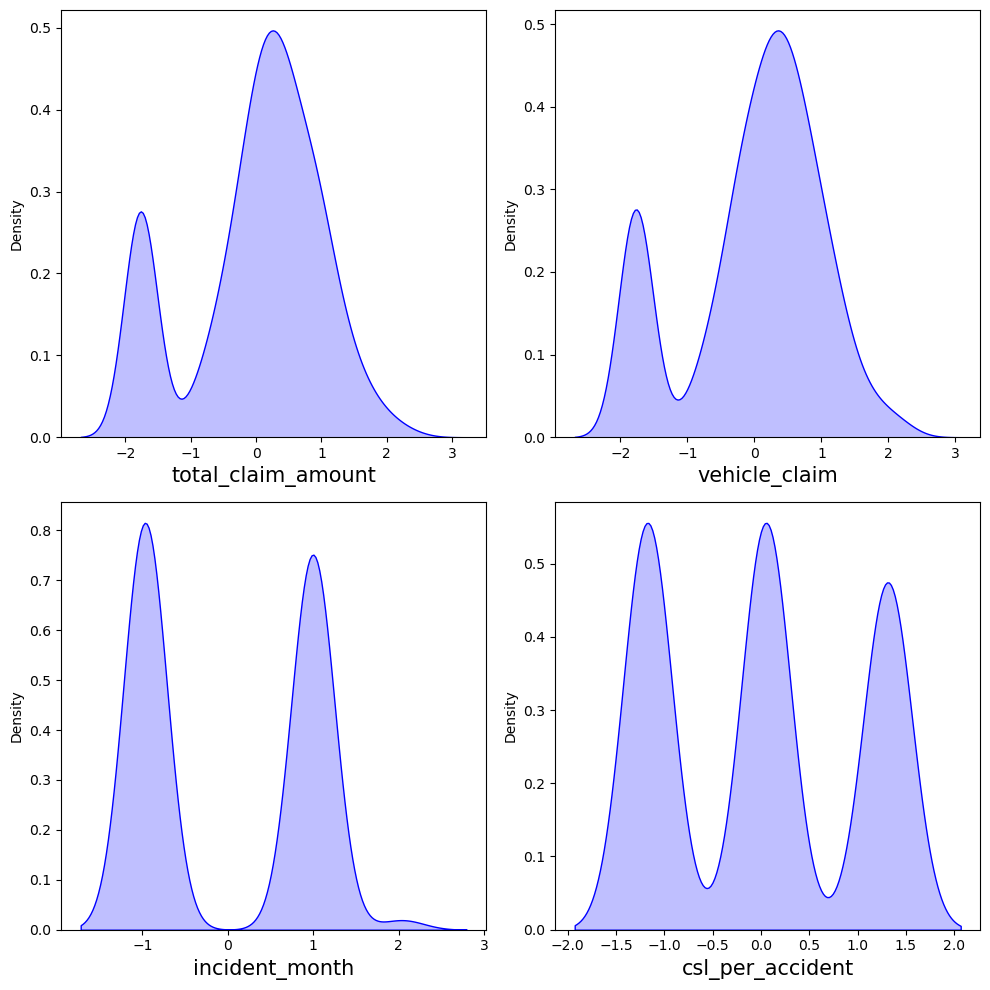

In [82]:
plt.figure(figsize=(10,10), facecolor='white')
plotnumber = 1

for column in new_df[skewed_features]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(new_df[column],color='b',hist=False,kde_kws={'shade':True})
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

The data looks almost normal after after removing skewness compared to previous data

In [84]:
#Encoding 
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(lbl.fit_transform)

In [85]:
# Correlationabs
corr = new_df.corr()
corr

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_model,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,csl_per_person,csl_per_accident,Vehicle_Age
months_as_customer,1.000000,0.922092,0.000118,0.023512,-0.003378,0.059002,-0.000848,0.005365,-0.092575,0.071097,...,0.002908,0.020966,0.058051,-0.004430,-0.046010,-0.004740,-0.049327,-0.022063,-0.022928,-0.001287
age,0.922092,1.000000,-0.015182,0.026772,0.005890,0.072900,0.001485,0.014030,-0.080587,0.075940,...,0.016258,0.012408,0.058530,0.005683,-0.035505,0.000843,-0.042259,-0.012844,-0.012459,-0.003268
policy_state,0.000118,-0.015182,1.000000,0.010740,0.014475,-0.019294,-0.032551,-0.031016,-0.040215,-0.018855,...,-0.024513,0.028864,0.011078,0.044056,-0.005709,0.024963,0.015844,-0.005866,-0.000653,-0.002323
policy_deductable,0.023512,0.026772,0.010740,1.000000,-0.008445,-0.011671,0.014571,-0.050024,0.005134,-0.021763,...,-0.003597,0.015833,0.001948,-0.026390,-0.048465,-0.023898,-0.030969,0.006634,0.006179,-0.027497
policy_annual_premium,-0.003378,0.005890,0.014475,-0.008445,1.000000,0.041830,-0.021475,0.030963,-0.014376,0.006474,...,-0.034998,-0.010174,-0.040755,-0.003040,0.001650,0.027156,-0.048497,0.028569,0.030755,0.040439
insured_sex,0.059002,0.072900,-0.019294,-0.011671,0.041830,1.000000,0.007473,-0.009257,-0.019600,0.004104,...,-0.017679,0.032173,0.043745,-0.001689,-0.031981,0.002369,-0.023193,-0.019001,-0.008959,0.028638
insured_education_level,-0.000848,0.001485,-0.032551,0.014571,-0.021475,0.007473,1.000000,-0.021502,0.022806,-0.021595,...,0.050878,0.011520,0.043706,-0.080717,0.017801,-0.035547,-0.053397,0.011093,0.010425,-0.045094
insured_occupation,0.005365,0.014030,-0.031016,-0.050024,0.030963,-0.009257,-0.021502,1.000000,-0.009818,-0.008141,...,0.020878,0.003335,0.011567,-0.013004,-0.025282,-0.019689,-0.015159,0.018978,0.019575,0.004827
insured_hobbies,-0.092575,-0.080587,-0.040215,0.005134,-0.014376,-0.019600,0.022806,-0.009818,1.000000,-0.097837,...,0.031208,-0.047983,0.018190,0.020865,-0.013819,0.019566,-0.029398,-0.013322,-0.007772,0.015606
insured_relationship,0.071097,0.075940,-0.018855,-0.021763,0.006474,0.004104,-0.021595,-0.008141,-0.097837,1.000000,...,0.062286,0.017992,0.017164,0.018963,-0.006190,-0.083118,-0.000349,-0.022125,-0.031298,0.026099


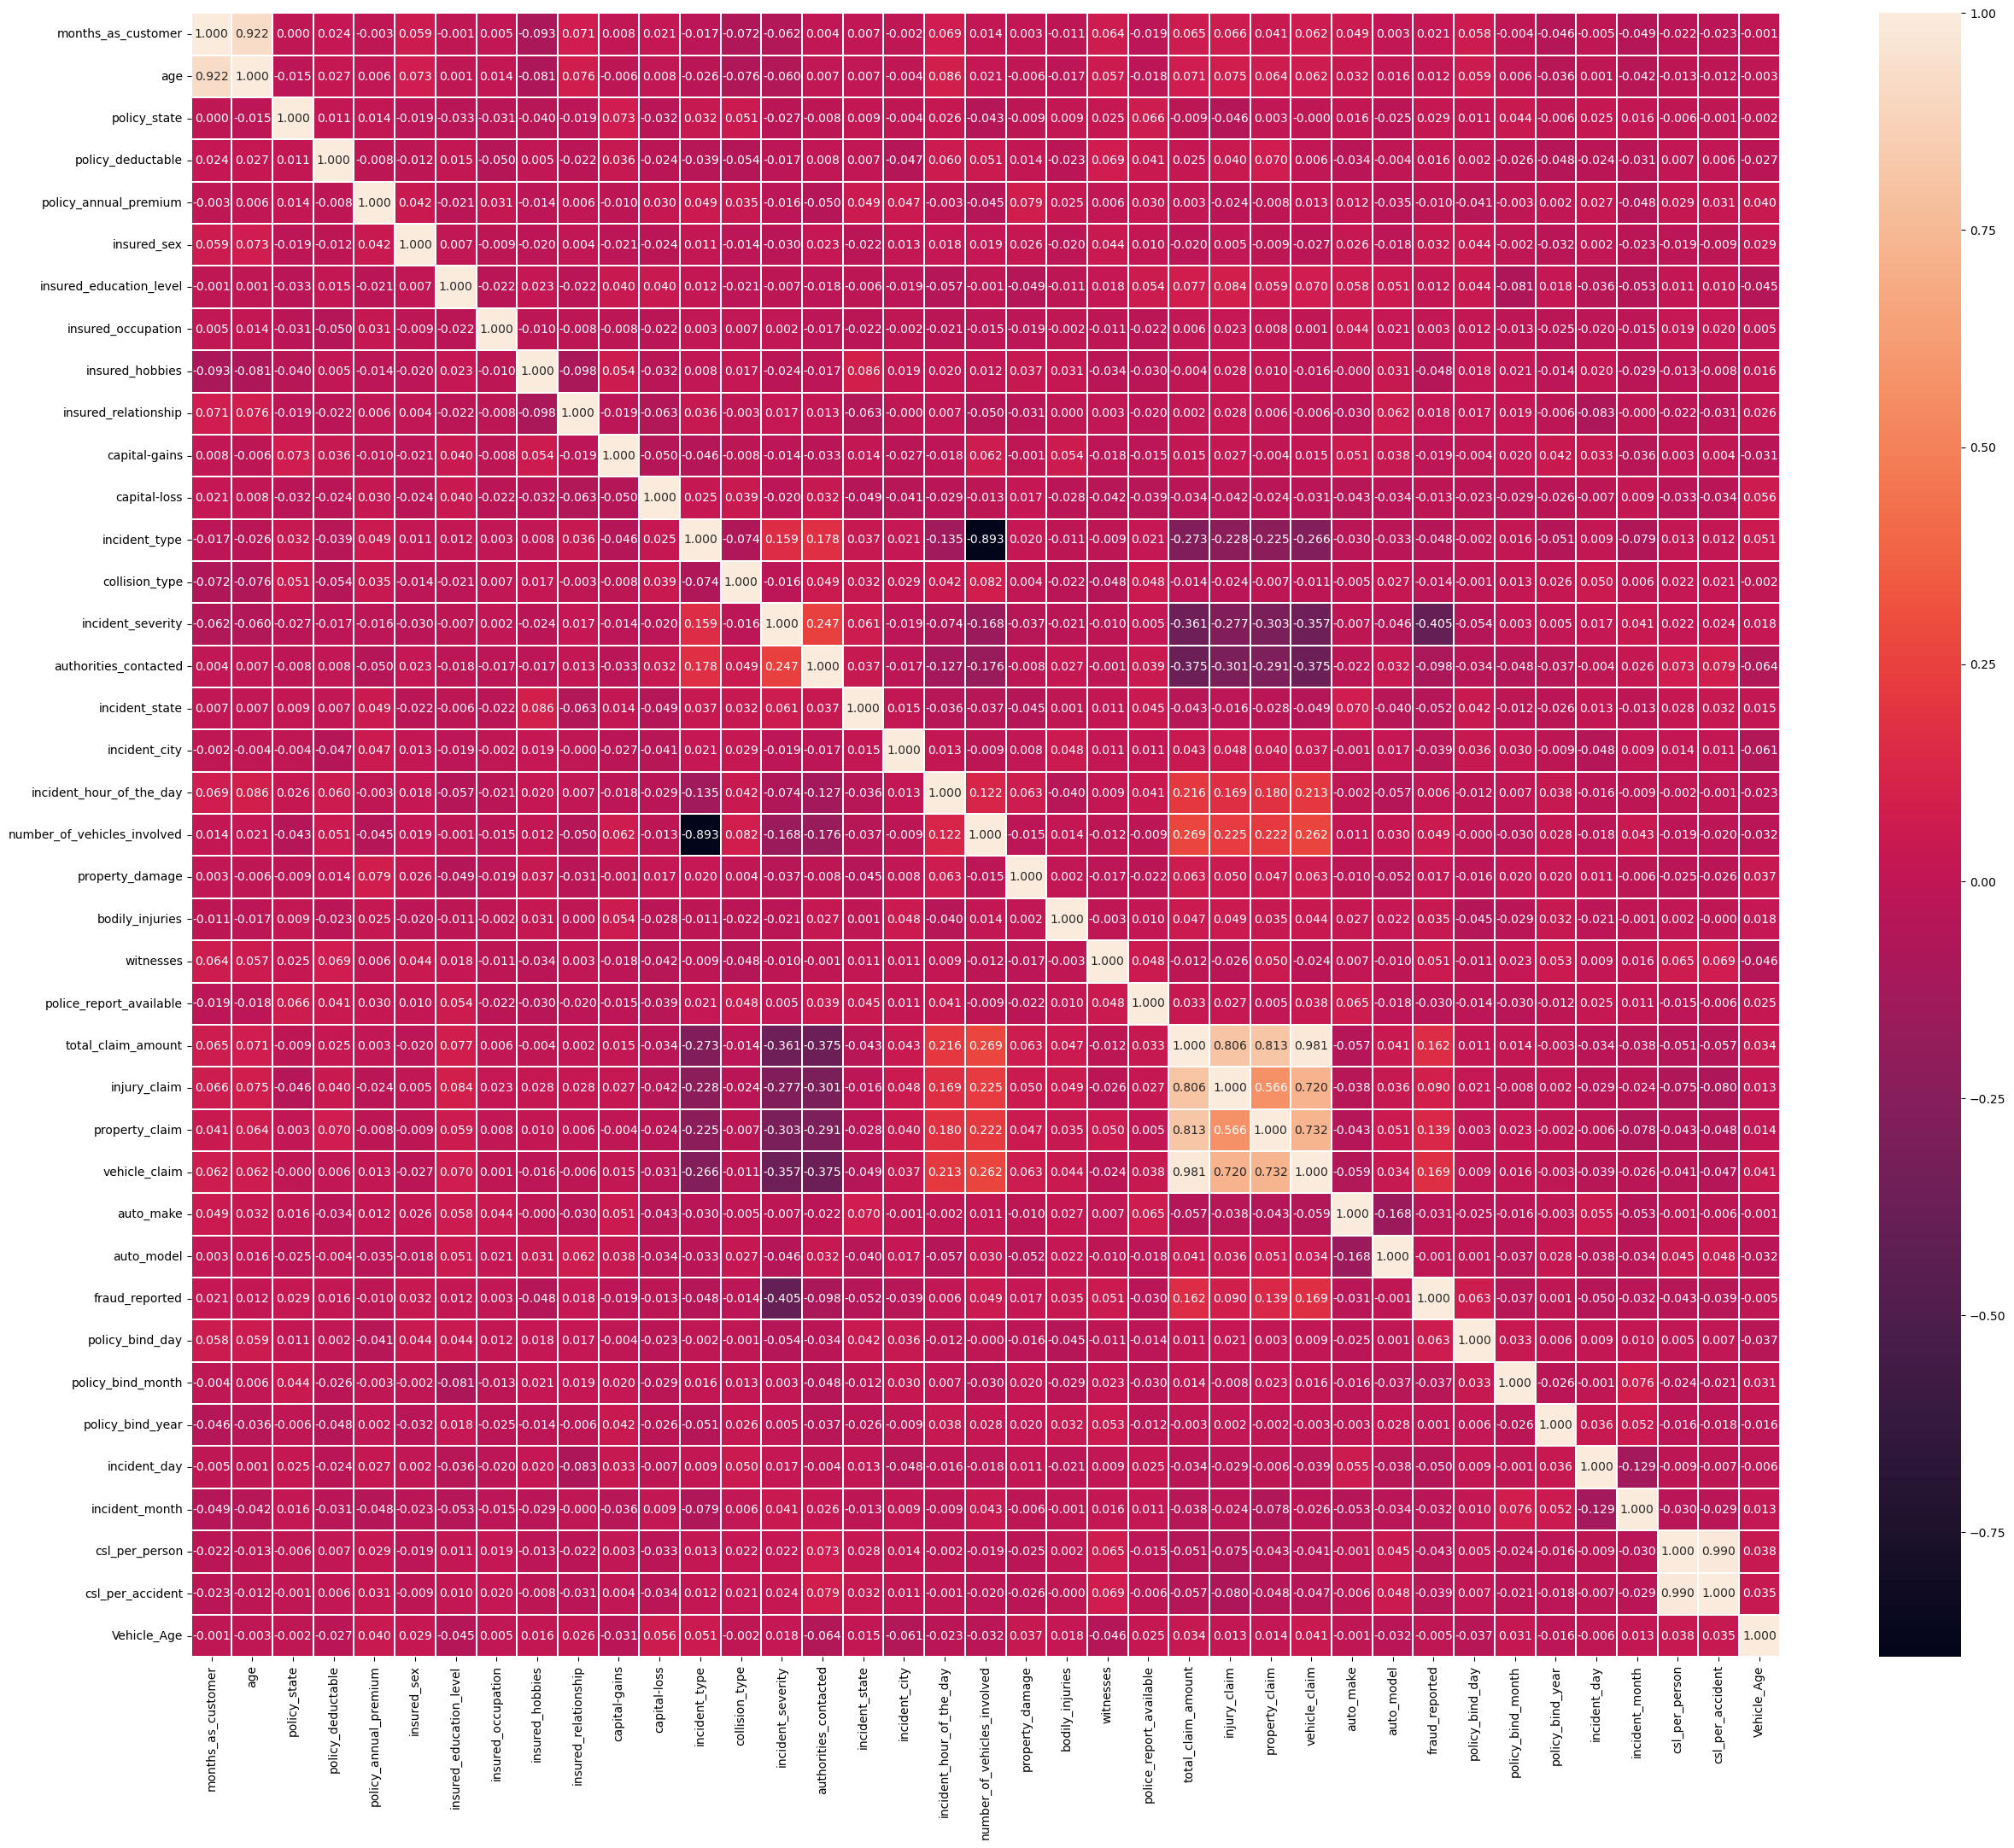

In [86]:
plt.figure(figsize=(30,25))
sns.heatmap(new_df.corr(),linewidths=.1,fmt="0.3f",annot=True)
plt.show()

This heatmap shows the correlation matrix by visualizing the data. We ccan observe the relation between one feature to other.

- This heatmap contain both positive and negative correlation
- We can observe the most of the columns ahe highly correlated with each other which vreates multicolinerity problem.
- We will check thew VIF value to overcome with this multicolinearity problem.

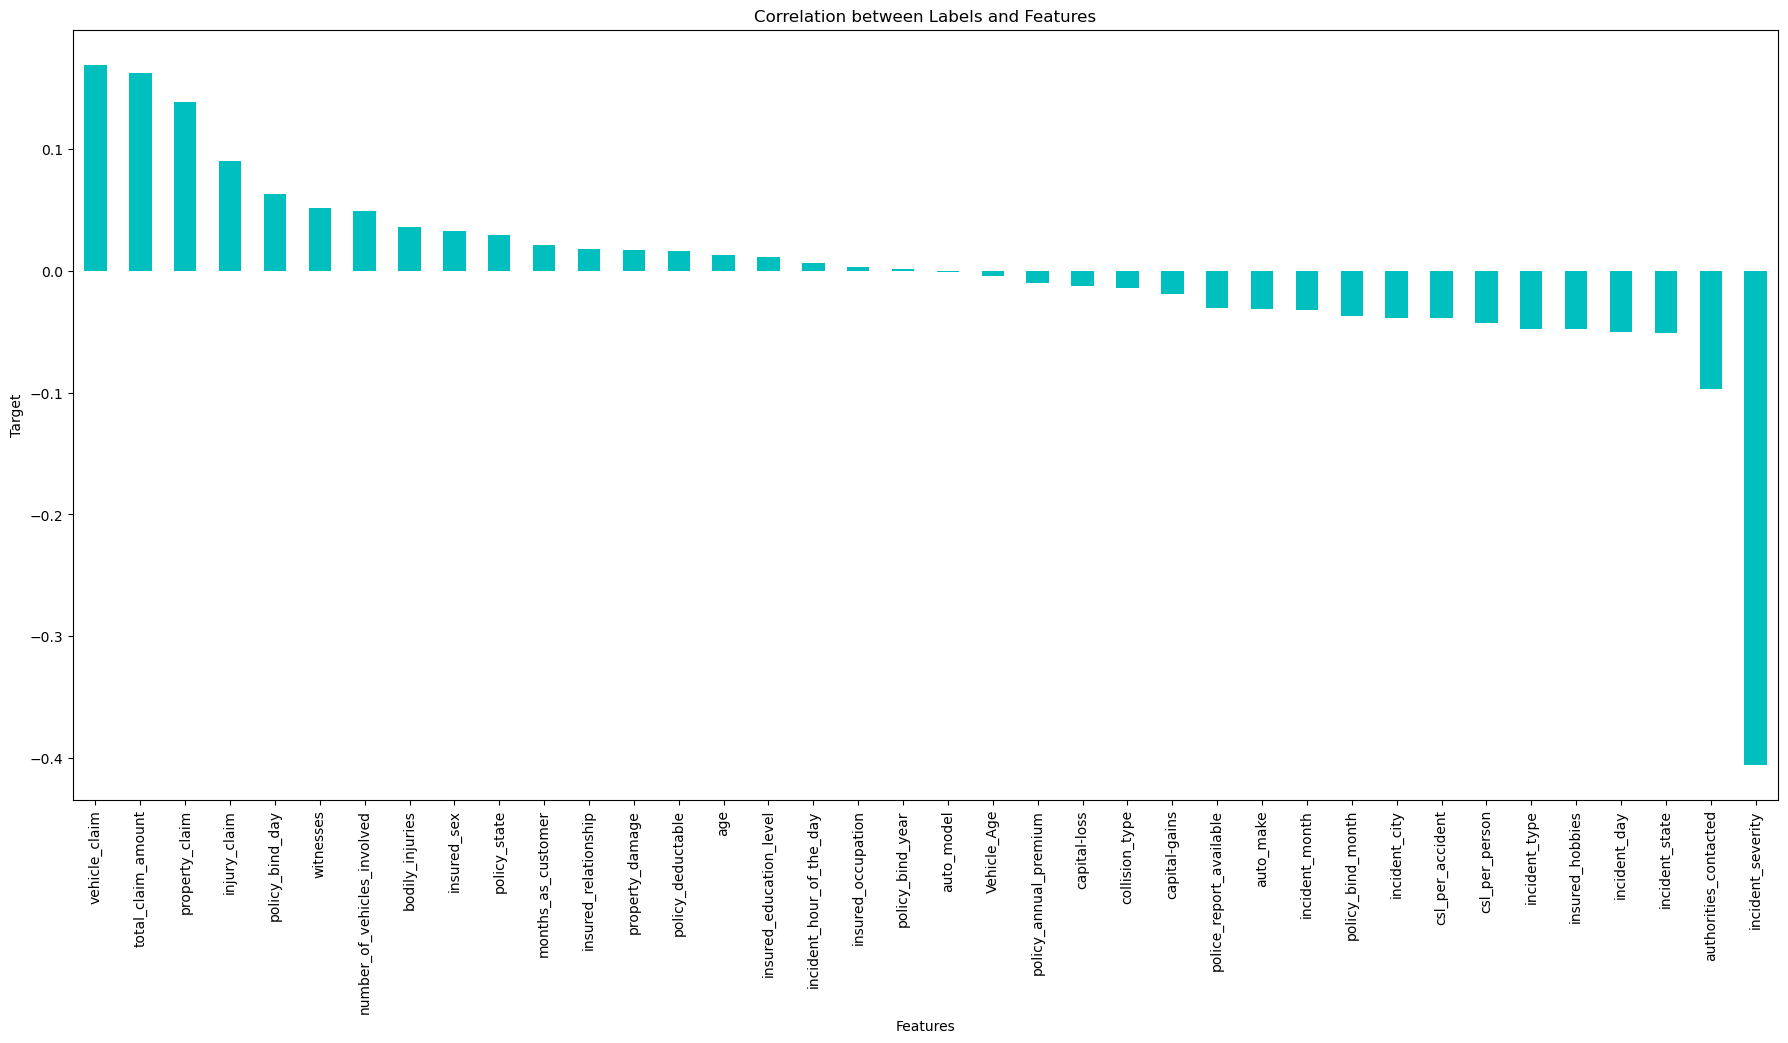

In [175]:
plt.figure(figsize=(22,10))
new_df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Correlation between Labels and Features')
plt.show()

- From the above bar plot we can observe that policy_bind_year,insured_occupation and auto_model are very less correlated with the target.

In [178]:
X = new_df.drop('fraud_reported',axis=1)
y = new_df['fraud_reported']

In [180]:
X.shape

(996, 38)

In [182]:
y.shape

(996,)

In [184]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_make,auto_model,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,csl_per_person,csl_per_accident,Vehicle_Age
0,1.074671,0.987190,1.186130,-0.224722,0.621371,1.075102,0.531088,-1.162296,1.280299,-1.436113,...,0.857248,-1.644810,0.179080,0.980399,1.686176,1.153049,-0.966028,-0.137684,0.052612,0.182338
1,0.204846,0.330455,-0.018137,1.409024,-0.251375,1.075102,0.531088,-0.166257,0.928186,-0.246617,...,0.360986,-0.657437,1.315157,-0.163352,0.599693,0.690948,-0.966028,-0.137684,0.052612,-0.316587
2,-0.612790,-1.092470,1.186130,1.409024,0.647301,-0.930144,1.557206,1.078792,-1.360550,0.348131,...,-0.631538,0.958263,-1.070604,0.694461,-0.215170,0.806473,0.996033,-1.066352,-1.174021,-0.316587
3,0.448397,0.221000,-1.222403,1.409024,0.658123,-0.930144,1.557206,-1.411305,-1.360550,0.942878,...,-0.879669,1.317308,1.087942,-0.449290,-1.573274,-0.579830,-0.966028,-0.137684,0.052612,-1.480744
4,0.204846,0.549367,-1.222403,-0.224722,1.358059,1.075102,-1.521148,1.078792,-1.360550,0.942878,...,-1.624063,1.048024,-1.070604,-0.163352,1.686176,0.228847,0.996033,1.410096,1.313327,-0.649203


In [188]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] =X.columns
vif

,VIF values,Features
0,6.857528,months_as_customer
1,6.855453,age
2,1.033908,policy_state
3,1.044484,policy_deductable
4,1.038164,policy_annual_premium
5,1.037538,insured_sex
6,1.052174,insured_education_level
7,1.017309,insured_occupation
8,1.052721,insured_hobbies
9,1.051544,insured_relationship


- Since we high vif value incsl_per_person and csl_per_accident. Lets remove csl_per_accident column as it has high vif value graeter than csl_per_person

In [191]:
X.drop('csl_per_person',axis=1,inplace=True)

In [201]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF values,Features
0,6.856185,months_as_customer
1,6.853874,age
2,1.032680,policy_state
3,1.044307,policy_deductable
4,1.037926,policy_annual_premium
5,1.032011,insured_sex
6,1.052156,insured_education_level
7,1.017244,insured_occupation
8,1.051218,insured_hobbies
9,1.047765,insured_relationship


In [203]:
X.drop('total_claim_amount',axis=1,inplace=True)

In [205]:
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF values,Features
0,6.854292,months_as_customer
1,6.853871,age
2,1.032624,policy_state
3,1.043018,policy_deductable
4,1.037473,policy_annual_premium
5,1.028294,insured_sex
6,1.052142,insured_education_level
7,1.016675,insured_occupation
8,1.049394,insured_hobbies
9,1.047763,insured_relationship


- We have resolved the multicolinearity problem from the data

In [208]:
y.value_counts()

fraud_reported
0    750
1    246
Name: count, dtype: int64

In [210]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,y = SM.fit_resample(X,y)

In [212]:
y.value_counts()

fraud_reported
1    750
0    750
Name: count, dtype: int64

- We have balanced the data in both X and y

In [215]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
maxAccu = 0
maxRS = 0
for i in range(0,200):
    X_train,X_test,y_train,y_test = TTS(X,y,test_size=0.30,random_state=i)
    RF = RandomForestClassifier()
    RF.fit(X_train,y_train)
    pred = RF.predict(X_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("The best Accuracy is", maxAccu,"at random state",maxRS)

The best Accuracy is 0.9288888888888889 at random state 78


In [217]:
X_train,X_test,y_train,y_test = TTS(X,y,test_size=0.30,random_state=78)

In [221]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [223]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)
predRF = RF.predict(X_test)
print(accuracy_score(y_test,predRF))
print(confusion_matrix(y_test,predRF))
print(classification_report(y_test,predRF))

0.9066666666666666
[[215  19]
 [ 23 193]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       234
           1       0.91      0.89      0.90       216

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.91      0.91      0.91       450



- The accuracy score for random forest classifier is 90.66%

In [228]:
svc = SVC()
svc.fit(X_train,y_train)
predsvc = svc.predict(X_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8644444444444445
[[204  30]
 [ 31 185]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       234
           1       0.86      0.86      0.86       216

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450



- The Accuracy score for SVC is 86.44%

In [231]:
GB = GradientBoostingClassifier()
GB.fit(X_train,y_train)
predGB = GB.predict(X_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9022222222222223
[[211  23]
 [ 21 195]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       234
           1       0.89      0.90      0.90       216

    accuracy                           0.90       450
   macro avg       0.90      0.90      0.90       450
weighted avg       0.90      0.90      0.90       450



- The Accuracy Score for Gradient Boosting Classifier is 90.22%

In [236]:
ET = ExtraTreesClassifier()
ET.fit(X_train,y_train)
predET = ET.predict(X_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9155555555555556
[[215  19]
 [ 19 197]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       234
           1       0.91      0.91      0.91       216

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450



- The Accuracy score for extra tree classifier is 91.55% 

In [239]:
print("Cross_validation_Score Of RandomForestRegressor is:",cross_val_score(RF,X,y,cv=5).mean())
print("Cross_validation_Score Of SVC is:",cross_val_score(svc,X,y,cv=5).mean())
print("Cross_validation_Score Of GradientBoostingClassifier is:",cross_val_score(GB,X,y,cv=5).mean())
print("Cross_validation_Score Of ExtraTreeClassifier is:",cross_val_score(ET,X,y,cv=5).mean())

Cross_validation_Score Of RandomForestRegressor is: 0.8779999999999999
Cross_validation_Score Of SVC is: 0.8626666666666667
Cross_validation_Score Of GradientBoostingClassifier is: 0.876
Cross_validation_Score Of ExtraTreeClassifier is: 0.9133333333333334


### The best Fit Model Is ExtraTreeClassifier

In [242]:
from sklearn.model_selection import GridSearchCV

In [246]:
parameters = {'criterion':['gini','entropy'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,10,20],
              'n_jobs':[-2,-1,1],
             'max_depth':[50,100,200,300]}

In [248]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)

In [250]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [50, 100, 200, 300],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 10, 20], 'n_jobs': [-2, -1, 1]})

In [252]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 300,
 'max_features': 'sqrt',
 'n_estimators': 20,
 'n_jobs': -1}

In [260]:
Final_model = ExtraTreesClassifier(criterion='entropy', max_depth=300, max_features='sqrt', n_estimators=20, n_jobs=-1)
Final_model.fit(X_train, y_train)

pred = Final_model.predict(X_test)

acc = accuracy_score(y_test, pred)
print(acc * 100)

89.33333333333333


- After Tuning we got 89.33% 

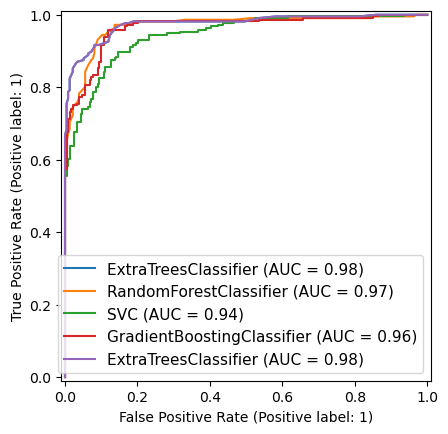

In [266]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay


disp = RocCurveDisplay.from_estimator(ET, X_test, y_test)  

RocCurveDisplay.from_estimator(RF, X_test, y_test, ax=disp.ax_)   
RocCurveDisplay.from_estimator(svc, X_test, y_test, ax=disp.ax_)  
RocCurveDisplay.from_estimator(GB, X_test, y_test, ax=disp.ax_)  
RocCurveDisplay.from_estimator(ET, X_test, y_test, ax=disp.ax_)   

plt.legend(prop={'size': 11}, loc='lower right')
plt.show()


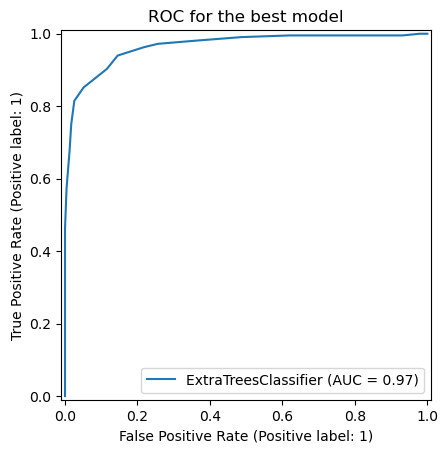

In [274]:
RocCurveDisplay.from_estimator(Final_model, X_test, y_test)
plt.title("ROC for the best model")
plt.show()

In [276]:
import joblib
joblib.dump(Final_model,'Insurance_Claims_Fraud_Detection.pkl')

['Insurance_Claims_Fraud_Detection.pkl']

In [278]:
model = joblib.load('Insurance_Claims_Fraud_Detection.pkl')

prediction = model.predict(X_test)
prediction

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,

In [280]:
a = np.array(y_test)
data = pd.DataFrame()
data['Predicted'] = prediction
data['Original'] = a
data

,Predicted,Original
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
445,1,1
446,0,0
447,0,0
448,0,0
